In [1]:
import sys
sys.path.append(sys.path[0] + '/deepkexpfam')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from utils import save_object, load_object
from utils import make_grid_data, plot_flow2D, plot_object2D, plot_outrange, flow_density
from flows import ObjectDataset, MLPLayers, AdditiveCouplingLayers, Flow

from Datasets import Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring

In [3]:
save_path = './saved_flows_additive/'
ensembles = 50

names = ['Funnel', 'Banana', 'Ring', 'Uniform', 'Cosine', 'Grid', 'Multiring']
objs = [Funnel(), Banana(), Ring(), Uniform(), Cosine(), Grid(), Multiring()]

x_interval, y_interval = np.linspace(-7, 7, 500), np.linspace(-7, 7, 500)
grid_x, grid_y, X = make_grid_data(x_interval, y_interval)

In [4]:
# Load all flow models from files

flows_dict = {}
for name in names:
    flow_ensemble = []
    for j in range(ensembles):
        flow = load_object(save_path+name+str(j))
        flow_ensemble.append(flow)
    flows_dict[name] = flow_ensemble


#compute and save/load density for all flows

pX_dict = {}
for name in names:
    pX_ensemble = np.zeros((len(flow_ensemble), len(x_interval), len(y_interval)))
    flow_ensemble = flows_dict[name]
    for i, flow in enumerate(flow_ensemble):
        pX_ensemble[i, :, :] = flow_density(flow, X).reshape(len(x_interval), len(y_interval))
        print(name + str(i))
    pX_dict[name] = pX_ensemble

save_object(pX_dict, save_path + 'pX_dict_ensemble')

# pX_dict = load_object(save_path + 'pX_dict_ensemble')

Funnel0
Funnel1
Funnel2
Funnel3
Funnel4
Funnel5
Funnel6
Funnel7
Funnel8
Funnel9
Funnel10
Funnel11
Funnel12
Funnel13
Funnel14
Funnel15
Funnel16
Funnel17
Funnel18
Funnel19
Funnel20
Funnel21
Funnel22
Funnel23
Funnel24
Funnel25
Funnel26
Funnel27
Funnel28
Funnel29
Funnel30
Funnel31
Funnel32
Funnel33
Funnel34
Funnel35
Funnel36
Funnel37
Funnel38
Funnel39
Funnel40
Funnel41
Funnel42
Funnel43
Funnel44
Funnel45
Funnel46
Funnel47
Funnel48
Funnel49
Banana0
Banana1
Banana2
Banana3
Banana4
Banana5
Banana6
Banana7
Banana8
Banana9
Banana10
Banana11
Banana12
Banana13
Banana14
Banana15
Banana16
Banana17
Banana18
Banana19
Banana20
Banana21
Banana22
Banana23
Banana24
Banana25
Banana26
Banana27
Banana28
Banana29
Banana30
Banana31
Banana32
Banana33
Banana34
Banana35
Banana36
Banana37
Banana38
Banana39
Banana40
Banana41
Banana42
Banana43
Banana44
Banana45
Banana46
Banana47
Banana48
Banana49
Ring0
Ring1
Ring2
Ring3
Ring4
Ring5
Ring6
Ring7
Ring8
Ring9
Ring10
Ring11
Ring12
Ring13
Ring14
Ring15
Ring16
Ring17
Ring

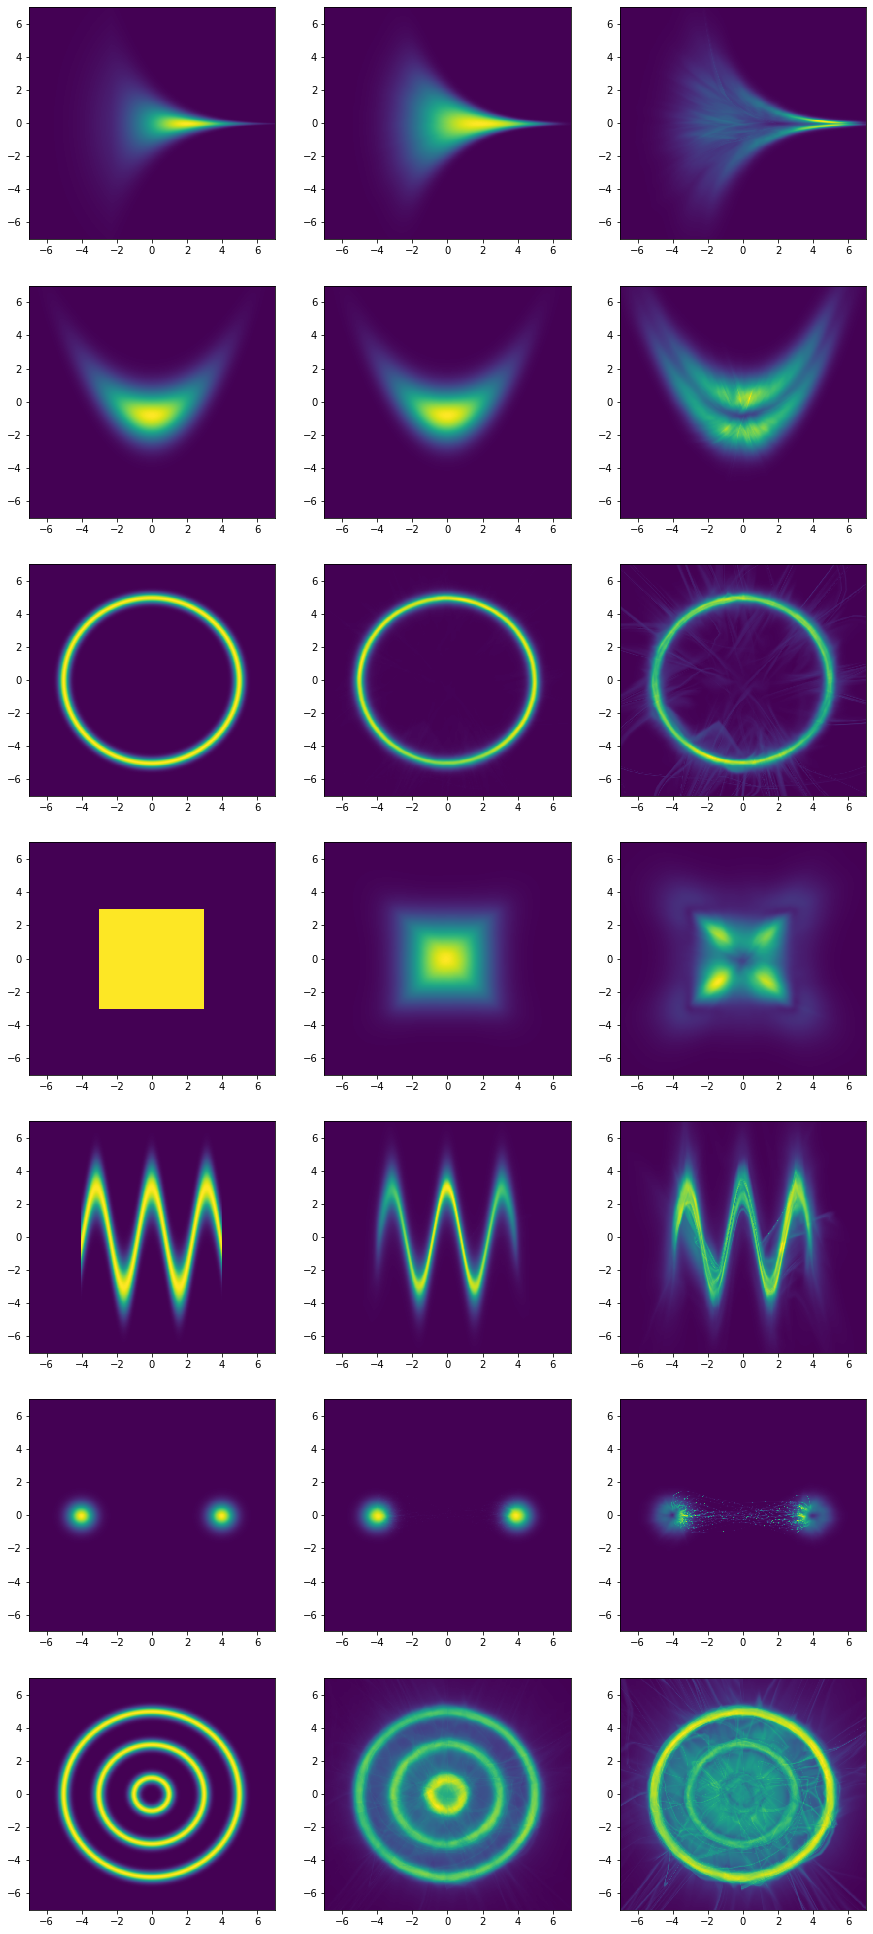

In [5]:
# plot mean and standard deviation
plt.figure(figsize=(15,35))
for i in range(len(names)):
    obj = objs[i]
    name = names[i]
    
    pX_ensemble = pX_dict[name]
    pX_mean = pX_ensemble.mean(axis=0)
    pX_std = pX_ensemble.std(axis=0)
    
    # clip large value
    #max_val = 0.1 * pX_std.max()
    #idx = pX_std > max_val
    #pX_std[idx] = max_val
    
    plt.subplot(7, 3, 3*i+1)
    plot_object2D(obj, x_interval, y_interval)
    plt.subplot(7, 3, 3*i+2)
    plt.pcolormesh(grid_x, grid_y, pX_mean, shading='auto')
    plt.subplot(7, 3, 3*i+3)
    plt.pcolormesh(grid_x, grid_y, pX_std, shading='auto')

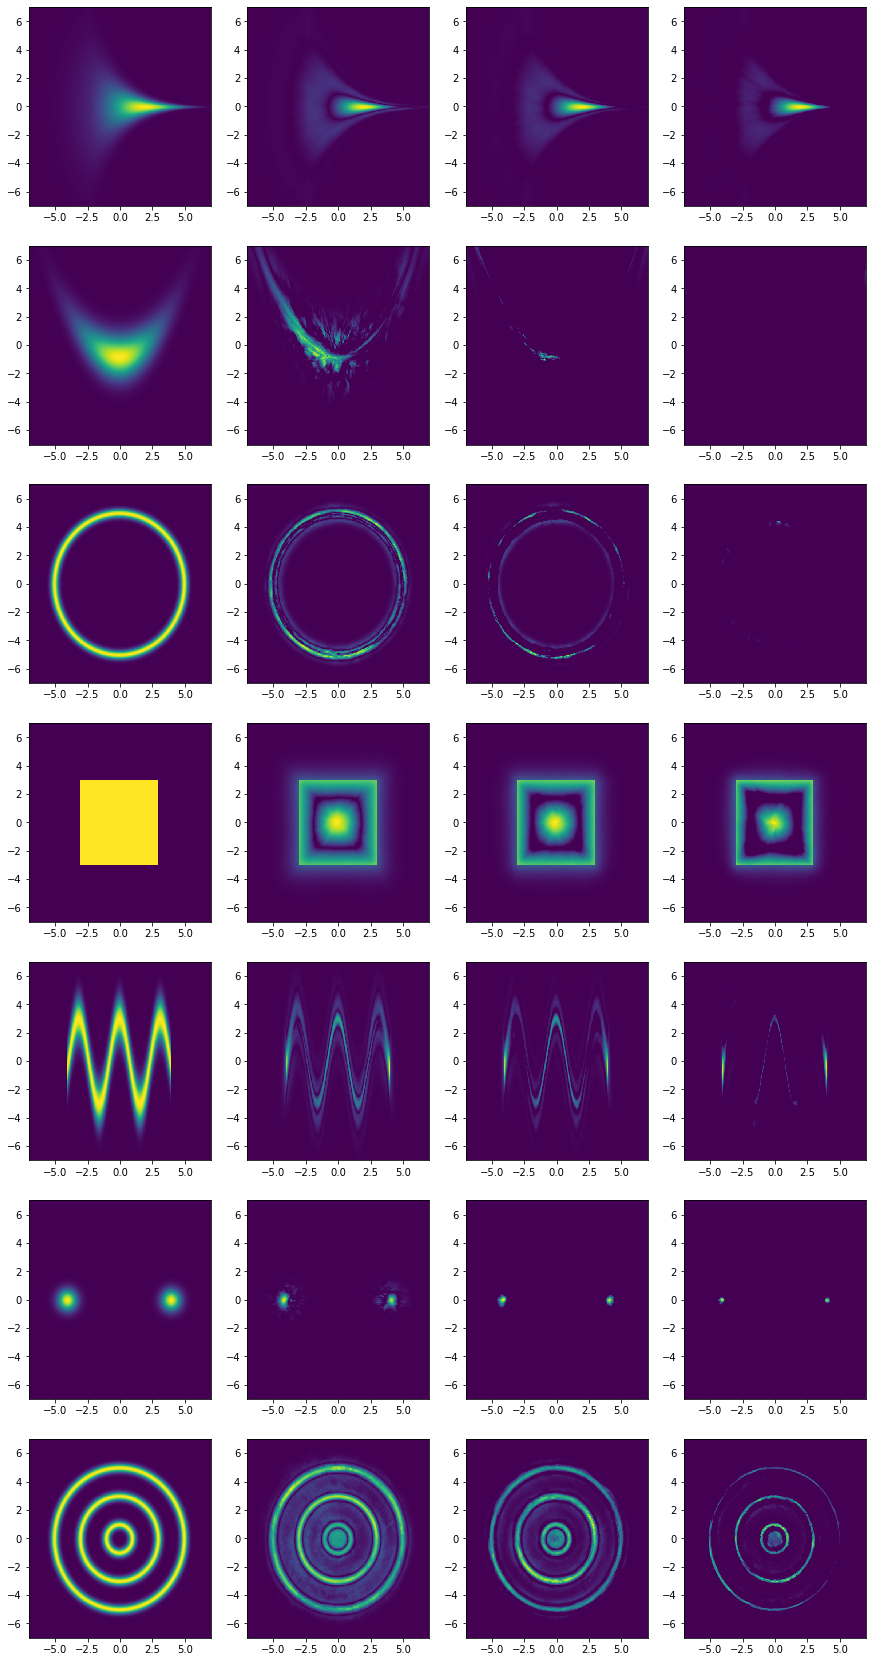

In [6]:
plt.figure(figsize=(15,30))
for i in range(len(names)):
    obj = objs[i]
    name = names[i]
    
    log_pX = obj.logpdf_multiple(X)
    pX = np.exp(log_pX).reshape(len(x_interval), len(y_interval))
    pX_ensemble = pX_dict[name]
    
    plt.subplot(7, 4, 4*i+1)
    plot_object2D(obj, x_interval, y_interval)
    plt.subplot(7, 4, 4*i+2)
    plot_outrange(pX, pX_ensemble, grid_x, grid_y, conf_interval=10)
    plt.subplot(7, 4, 4*i+3)
    plot_outrange(pX, pX_ensemble, grid_x, grid_y, conf_interval=50)
    plt.subplot(7, 4, 4*i+4)
    plot_outrange(pX, pX_ensemble, grid_x, grid_y, conf_interval=90)

In [7]:
conf_intervals = [10, 50, 90]

table = {}

for i in range(len(names)):
    obj = objs[i]
    name = names[i]
    
    log_pX = obj.logpdf_multiple(X)
    pX = np.exp(log_pX).reshape(len(x_interval), len(y_interval))
    pX_ensemble = pX_dict[name]
    
    means = []
    for conf_interval in conf_intervals:
        pX_outrange = np.zeros_like(pX)

        gap = (100 - conf_interval) / 2
        pX_down = np.percentile(pX_ensemble, gap, axis=0)
        pX_up = np.percentile(pX_ensemble, 100-gap, axis=0)

        idx_up = pX > pX_up
        idx_down = pX < pX_down

        pX_outrange[idx_up] = (pX - pX_up)[idx_up]
        pX_outrange[idx_down] = (pX_down - pX)[idx_down]

        means.append(pX_outrange.mean())
    print(name)
    
    table[name] = means
    

Funnel
Banana
Ring
Uniform
Cosine
Grid
Multiring


In [8]:
print('\t\t', end='')
for conf_interval in conf_intervals:
    print(str(conf_interval) + '%', end='\t')

print('')

for name in names:
    print(name, end='    ')
    for mean in table[name]:
        print('\t%2.2f' % (mean*1e6), end='')
    
    print('')
    
print('\nAverage deviation from confidence interval * 1e6')

		10%	50%	90%	
Funnel    	1138.41	932.21	675.94
Banana    	25.57	0.47	0.00
Ring    	489.69	56.67	0.05
Uniform    	2742.05	2321.82	1757.10
Cosine    	1017.38	538.79	125.49
Grid    	168.01	50.96	14.56
Multiring    	3188.89	1342.14	164.75

Average deviation from confidence interval * 1e6
